---

# Statistics and Statistical Data Mining - Coursework

---

<hr>
<u><h2>Introduction</h2></u>
<pre>
In this task, we were instructed to implement several data pre-processing and engineering
steps that are common in data science and machine learning. These steps involve several
key topics in statistics.
</pre>

<pre>
The dataset we were provided for this task contains data about house sale prices.
The file ‘data_description.txt’ contains a detailed description of all the variables,
what they represent, their values and so on. The target variable is ‘SalePrice’,
which is the house’s sale price in US dollars.
</pre>

<hr>
<u><h2>Implementation</h2></u>

<h3>1.</h3>
<pre>
Import the required libraries.
</pre>

In [1]:

# to handle datasets
import pandas as pd
import numpy as np

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
# suppress some warning
pd.options.mode.chained_assignment = None  # default='warn'

# ===== Add Imports here =====

# to visualize qq plot
import pylab

# to do normality tests 
import scipy.stats as stats
from scipy.stats import normaltest
from scipy.stats import chisquare
from scipy.stats import shapiro

# to do train/test data split
from sklearn.model_selection import train_test_split

# to one-hot encode data sets
from sklearn.preprocessing import OneHotEncoder

# to scale data sets
from sklearn.preprocessing import MinMaxScaler

<h3>2.</h3>
<pre>
Load the data using pandas and plot a Histogram of the SalePrice
column. This code is provided for you, do not change it
</pre>

array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

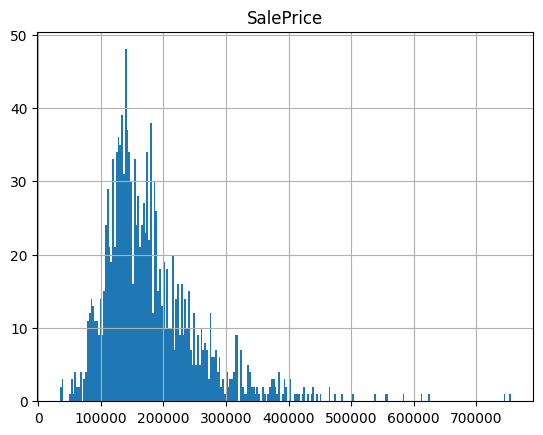

In [2]:
# load dataset
data = pd.read_csv('house-price-data.csv')

data.hist(column='SalePrice',  bins = 250)

<h3>3.</h3>
<pre>
The SalePrice column is not normally distributed (i.e. not Gaussian),
prove this by running a statistical test and obtaining and interpreting the
p-value.
</pre>
<p><b>[5 marks]</b></p>
<a href="#ref-1">[1]</a><a href="#ref-2">[2]</a>

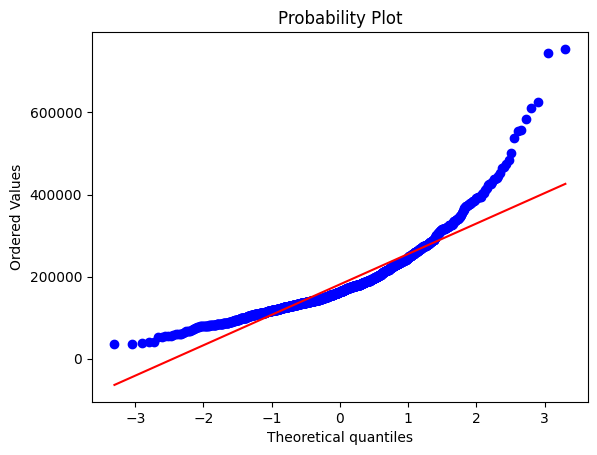

Test p's:
- Normal: 2.283848353787728e-133
- Chi-Square: 0.0
- Shapiro-Wilk: 3.2072044604461286e-33
Does not look Gaussian!


In [3]:
# Test to check normality of the SalePrice column
stats.probplot(data['SalePrice'], dist="norm", plot=pylab)
pylab.show()

# do a normality test
normaltest_p = normaltest(data['SalePrice'])[1]
chisquare_p = chisquare(data['SalePrice'])[1]
shapiro_p = shapiro(data['SalePrice'])[1]
print("Test p's:")
print(f"- Normal: {normaltest_p}")
print(f"- Chi-Square: {chisquare_p}")
print(f"- Shapiro-Wilk: {shapiro_p}")

if (normaltest_p > 0.05 or chisquare_p > 0.05 or shapiro_p > 0.05):
    print("Does look Gaussian!")
else:
    print("Does not look Gaussian!")


<h3>4.</h3>
<pre>
Split data into train and test sets making sure the test set is 30% of the
original data and the remaining 70% are for training. This code is
provided for you, do not change it.
</pre>
<a href="#ref-3">[3]</a>

In [4]:
### Split data into train and test sets 
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, # features or predictive variables
    y, # target
    test_size=0.3, # portion of dataset to allocate to test set
    random_state=10, # we are setting the seed here
)

X_train.shape, X_test.shape

((1022, 54), (438, 54))

<h3>5.</h3>
<pre>
Create a list of all categorical variables (by checking their type in the
original dataset).
</pre>
<p><b>[2 marks]</b></p>
<p>Correct solution says there are 19 of them.</p>
<a href="#ref-4">[4]</a>

In [5]:
# let's identify the categorical variables
# we will capture those of type object

# get columns filtered by type 'object'
category_columns = X_train.select_dtypes(include=['object'])
cat_vars = category_columns.dtypes.index.tolist()

# number of categorical variables
len(cat_vars)

19

<h3>6.</h3>
<pre>
Using the training set (X_train), create a list of all categorical variables
that contain missing data and print the percentage of missing values
per variable in X_train. 
</pre>
<p><b>[3 marks]</b></p>

<a href="#ref-5">[5]</a>

In [6]:
# make a list of the categorical variables that contain missing values

rows = X_train.shape[0]

cat_vars_with_na = (
    category_columns
        .isnull()
        .aggregate(func= lambda x: 100*sum(x)/rows)
        .sort_values(ascending= False)
        .loc[lambda x : x > 0.0]
)

# print percentage of missing values per variable

print(cat_vars_with_na)


Alley           93.444227
Fence           80.528376
FireplaceQu     46.868885
GarageCond       5.381605
GarageQual       5.381605
GarageFinish     5.381605
BsmtFinType1     2.544031
BsmtFinType2     2.544031
BsmtExposure     2.544031
BsmtCond         2.544031
BsmtQual         2.544031
dtype: float64


<h3>7.</h3>
<pre>
Using the result of the previous step: For categorical variables with
more than 10% of data missing, replace missing data with the word
'Missing', in other variables replace the missing data with the most
frequent category in the training set (Apply the replacement to X_train
and X_test and make sure it is based on the results you have obtained
from the training set). 
</pre>
<p><b>[5 marks]</b></p>

In [7]:
# variables to impute with the string missing
with_string_missing = cat_vars_with_na.loc[lambda x : x > 10.0].index.tolist()

# variables to impute with the most frequent category
with_frequent_category = cat_vars_with_na.loc[lambda x : x <= 10.0].index.tolist()

In [8]:
print(with_string_missing)
print(with_frequent_category)

['Alley', 'Fence', 'FireplaceQu']
['GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual']


In [9]:
# replace missing values in X_train and X_test with new label: "Missing"

X_train[with_string_missing] = X_train[with_string_missing].fillna("Missing")
X_test[with_string_missing] = X_test[with_string_missing].fillna("Missing")

In [10]:
# replace missing values in X_train and X_test with the mode of each variable

X_train[with_frequent_category] = X_train[with_frequent_category].fillna(X_train.mode().iloc[0])
X_test[with_frequent_category] = X_test[with_frequent_category].fillna(X_test.mode().iloc[0])

In [11]:
# check that we have no missing information in the engineered variables
X_train[cat_vars_with_na.index.tolist()].isnull().sum()

Alley           0
Fence           0
FireplaceQu     0
GarageCond      0
GarageQual      0
GarageFinish    0
BsmtFinType1    0
BsmtFinType2    0
BsmtExposure    0
BsmtCond        0
BsmtQual        0
dtype: int64

<h3>8.</h3>
<pre>
Create a list of all numerical variables (do not include SalePrice).
</pre>
<p><b>[2 marks]</b></p>
<p>Correct solution says there are 35 of them.</p>

In [12]:
# now let's identify the numerical variables

# get columns filtered by type 'int64' or 'float'
num_columns = X_train.select_dtypes(include=['int64','float'])
num_vars = num_columns.dtypes


# number of numerical variables
len(num_vars)

35

<h3>9.</h3>
<pre>
Create a list of all numerical variables that contain missing data and
print out the percentage of missing values per variable (use the training
data).
</pre>
<p><b>[3 marks]</b></p>

In [13]:
# make a list with the numerical variables that contain missing values
rows = X_train.shape[0]

vars_with_na = (
    num_columns
        .isnull()
        .aggregate(func= lambda x: 100*sum(x)/rows)
        .sort_values(ascending= False)
        .loc[lambda x : x > 0.0]
)

# print percentage of missing values per variable

print(vars_with_na)

LotFrontage    17.318982
GarageYrBlt     5.381605
MasVnrArea      0.489237
dtype: float64


<h3>10.</h3>
<pre>
Using the result of the previous step: For numerical variables with less
than 15% of data missing, replace missing data with the mean of the
variable, in other variables replace the missing data with the median of
the variable in the training set (Apply the replacement to X_train and
X_test and make sure it is based on the results you have obtained from
the training set).
</pre>
<p><b>[5 marks]</b></p>

In [14]:
# variables to impute with the median
with_mean = vars_with_na.loc[lambda x : x < 15.0].index.tolist()

# variables to impute with the mean
with_median = vars_with_na.loc[lambda x : x >= 15.0].index.tolist()

In [15]:
# replace missing values as we described above

X_train[with_mean] = X_train[with_mean].fillna(X_train[with_mean].mean())
X_test[with_mean] = X_test[with_mean].fillna(X_test[with_mean].mean())

X_train[with_median] = X_train[with_median].fillna(X_train[with_median].median())
X_test[with_median] = X_test[with_median].fillna(X_test[with_median].median())

In [16]:
# check that we have no more missing values in the engineered variables
X_test[vars_with_na.index.tolist()].isnull().sum()

LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64

<h3>11.</h3>
<pre>
In the train and test sets, replace the values of variables 'YearBuilt',
'YearRemodAdd' and 'GarageYrBlt' with the time elapsed between
them and the year in which the house was sold 'YrSold'. After that drop
the 'YrSold' column. 
</pre>
<p><b>[5 marks]</b></p>

In [17]:
X_train[['YearBuilt','YearRemodAdd','GarageYrBlt']] = X_train[['YearBuilt','YearRemodAdd','GarageYrBlt']].subtract(X_train['YrSold'], axis=0) * -1
X_test[['YearBuilt','YearRemodAdd','GarageYrBlt']] = X_test[['YearBuilt','YearRemodAdd','GarageYrBlt']].subtract(X_test['YrSold'], axis=0) * -1

In [18]:
# now we drop YrSold
X_train.drop(['YrSold'], axis=1, inplace=True)
X_test.drop(['YrSold'], axis=1, inplace=True)
X_train.head()

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
912,51.0,6120,Missing,Lvl,1Fam,1Story,5,7,81,56,Gable,0.0,TA,TA,TA,TA,No,Rec,489,Unf,0,279,768,TA,1015,0,0,1015,0,0,1,0,3,1,TA,6,0,Missing,81.0,Unf,1,450,TA,TA,0,0,112,0,120,0,MnPrv,620,7
373,79.0,10634,Missing,Lvl,1Fam,1Story,5,6,56,56,Gable,0.0,TA,TA,TA,TA,No,BLQ,428,LwQ,180,0,608,TA,1319,0,0,1319,1,0,1,0,3,1,TA,5,0,Missing,56.0,Unf,1,270,TA,TA,66,0,0,0,0,0,GdWo,0,11
20,101.0,14215,Missing,Lvl,1Fam,2Story,8,5,1,0,Gable,380.0,Gd,TA,Ex,TA,Av,Unf,0,Unf,0,1158,1158,Ex,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,1,Gd,1.0,RFn,3,853,TA,TA,240,154,0,0,0,0,Missing,0,11
800,79.0,12798,Missing,HLS,1Fam,2Story,6,5,11,11,Gable,0.0,TA,TA,Gd,TA,Gd,GLQ,462,Unf,0,154,616,Gd,616,1072,0,1688,1,0,2,1,4,1,Gd,8,0,Missing,11.0,RFn,2,603,TA,TA,403,114,185,0,0,0,Missing,400,5
152,70.0,14803,Missing,Lvl,1Fam,2Story,6,5,35,35,Gable,252.0,TA,TA,TA,TA,No,Rec,416,Unf,0,409,825,Gd,1097,896,0,1993,0,0,2,1,4,1,TA,8,1,Gd,35.0,RFn,2,495,TA,TA,0,66,0,0,0,0,GdWo,0,6


<h3>12.</h3>
<pre>
Apply mappings to categorical variables that have an order.
</pre>
<pre>
Some of the categorical variables have values with an assigned order (in total there should be 14 of them),
related to quality (For more information, check the data description file).
This means, we can replace categories by numbers to determine quality.
For example, values in the 'BsmtExposure' can be mapped as follows: 'No' can be mapped to 1, 'Mn' can be mapped to 2, 'Av' can be mapped to 3 and 'Gd' can be mapped to 4. 
</pre>
<pre>
One way of doing this is to manually create mappings similar to the example given.
Each mapping can be saved as a Python dictionary and used to perform the actual mapping to transform the described variables from categorical to numerical.
</pre>
<pre>
To Make it easier for you, here are groups of variables that have the same mappings (Hint: you can map both categories 'Missing' and 'NA' to 0): 
</pre>
<pre>
- The following variable groups have the same mapping: 
    - ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu','GarageQual', 'GarageCond']
    - ['BsmtFinType1', 'BsmtFinType2']
</pre>
<pre>
- Each of the following variables has its own mapping: 'BsmtExposure', 'GarageFinish', 'Fence'
</pre>
<p><b>[5 marks]</b></p>
(in total there should be 14 of them).


<a href="#ref-6">[6]</a>

In [19]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

## Loop through the variables and apply the mapping here
# Apply mapping on the train and test sets

X_train[qual_vars] = X_train[qual_vars].applymap(lambda x: qual_mappings[x])
X_test[qual_vars] = X_test[qual_vars].applymap(lambda x: qual_mappings[x])

In [20]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'

## Apply the mapping here
# Apply mapping on the train and test sets

X_train[var] = X_train[var].apply(lambda x: exposure_mappings[x])
X_test[var] = X_test[var].apply(lambda x: exposure_mappings[x])

In [21]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

## Loop through the variables and apply the mapping here
# Apply mapping on the train and test sets

X_train[finish_vars] = X_train[finish_vars].applymap(lambda x: finish_mappings[x])
X_test[finish_vars] = X_test[finish_vars].applymap(lambda x: finish_mappings[x])

In [22]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

## Apply the mapping here
# Apply mapping on the train and test sets

X_train[var] = X_train[var].apply(lambda x: garage_mappings[x])
X_test[var] = X_test[var].apply(lambda x: garage_mappings[x])

In [23]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

## Apply the mapping here
# Apply mapping on the train and test sets

X_train[var] = X_train[var].apply(lambda x: fence_mappings[x])
X_test[var] = X_test[var].apply(lambda x: fence_mappings[x])

In [24]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [25]:
X_train.head()

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
912,51.0,6120,Missing,Lvl,1Fam,1Story,5,7,81,56,Gable,0.0,3,3,3,3,1,3,489,1,0,279,768,3,1015,0,0,1015,0,0,1,0,3,1,3,6,0,0,81.0,1,1,450,3,3,0,0,112,0,120,0,3,620,7
373,79.0,10634,Missing,Lvl,1Fam,1Story,5,6,56,56,Gable,0.0,3,3,3,3,1,4,428,2,180,0,608,3,1319,0,0,1319,1,0,1,0,3,1,3,5,0,0,56.0,1,1,270,3,3,66,0,0,0,0,0,2,0,11
20,101.0,14215,Missing,Lvl,1Fam,2Story,8,5,1,0,Gable,380.0,4,3,5,3,3,1,0,1,0,1158,1158,5,1158,1218,0,2376,0,0,3,1,4,1,4,9,1,4,1.0,2,3,853,3,3,240,154,0,0,0,0,0,0,11
800,79.0,12798,Missing,HLS,1Fam,2Story,6,5,11,11,Gable,0.0,3,3,4,3,4,6,462,1,0,154,616,4,616,1072,0,1688,1,0,2,1,4,1,4,8,0,0,11.0,2,2,603,3,3,403,114,185,0,0,0,0,400,5
152,70.0,14803,Missing,Lvl,1Fam,2Story,6,5,35,35,Gable,252.0,3,3,3,3,1,3,416,1,0,409,825,4,1097,896,0,1993,0,0,2,1,4,1,3,8,1,4,35.0,2,2,495,3,3,0,66,0,0,0,0,2,0,6


<h3>13.</h3>
<pre>
For the remaining five categorical variables (the variables that you did not apply value mappings to, they should be five variables),
you will need to group those categories that are present in less than 1% of the observations in the training set.
That is, all values of categorical variables that are shared by less than 1% of houses in the training set will be replaced by the string "Rare" in both the training and test set. 

- Find rare labels in the remaining categorical variables and replace them with the category 'Rare'.
- Rare labels are those categories that only appear in a small percentage of the observations (in our case in < 1%).
- If you look at unique values in a categorical variable in the training set and count how many times each of the unique values appear in the variable,
you can compute the percentage of each unique value by dividing its count by the total number of observations.
- Remember to make the computions using the training set and replacement in both training and test sets.
</pre>
<p><b>[5 marks]</b></p>

<a href="#ref-7">[7]</a>

In [26]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

5

In [27]:
#values before mapping
for cat in cat_others:
    print(str(cat) + ": " + str(list(dict.fromkeys(X_train[cat].sort_values().tolist()))))

Alley: ['Grvl', 'Missing', 'Pave']
LandContour: ['Bnk', 'HLS', 'Low', 'Lvl']
BldgType: ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE']
HouseStyle: ['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl']
RoofStyle: ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed']


In [28]:
## Loop through the variables and apply the replacement here
# Apply replacement on the train and test sets

for cat in cat_others:
    frequencies = X_train[cat].value_counts(normalize=True)
    
    mapping = X_train[cat].map(frequencies)
    X_train[cat] = X_train[cat].mask(mapping < 0.01, 'Rare')
    
    mapping = X_test[cat].map(frequencies)
    X_test[cat] = X_test[cat].mask(mapping < 0.01, 'Rare')

In [29]:
#values after mapping
for cat in cat_others:
    print(str(cat) + ": " + str(list(dict.fromkeys(X_train[cat].sort_values().tolist()))))

Alley: ['Grvl', 'Missing', 'Pave']
LandContour: ['Bnk', 'HLS', 'Low', 'Lvl']
BldgType: ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE']
HouseStyle: ['1.5Fin', '1Story', '2Story', 'Rare', 'SFoyer', 'SLvl']
RoofStyle: ['Gable', 'Hip', 'Rare']


<h3>14.</h3>
<pre>
Perform one hot encoding to transform the previous five categorical
variables into binary variables. Make sure you do it correctly for both
the training and testing sets. After this, remember to drop the original
five categorical variables (the ones with the strings) from the training
and test after the encoding.
</pre>
<p><b>[5 marks]</b></p>

<a href="#ref-8">[8]</a>

In [30]:
## Loop through the variables and apply the one-hot encoding here
# Apply encoding on the train and test sets
# Pay attention and make sure you do it correctly

enc = OneHotEncoder(sparse_output=False,drop='first')

X_train = pd.concat([X_train, pd.DataFrame(enc.fit_transform(X_train[cat_others]), index=X_train.index, columns=enc.get_feature_names_out())], axis='columns')
X_test = pd.concat([X_test, pd.DataFrame(enc.transform(X_test[cat_others]), index=X_test.index, columns=enc.get_feature_names_out())], axis='columns')

In [31]:
X_train

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,Alley_Missing,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare
912,51.0,6120,Missing,Lvl,1Fam,1Story,5,7,81,56,Gable,0.0,3,3,3,3,1,3,489,1,0,279,768,3,1015,0,0,1015,0,0,1,0,3,1,3,6,0,0,81.0,1,1,450,3,3,0,0,112,0,120,0,3,620,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
373,79.0,10634,Missing,Lvl,1Fam,1Story,5,6,56,56,Gable,0.0,3,3,3,3,1,4,428,2,180,0,608,3,1319,0,0,1319,1,0,1,0,3,1,3,5,0,0,56.0,1,1,270,3,3,66,0,0,0,0,0,2,0,11,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20,101.0,14215,Missing,Lvl,1Fam,2Story,8,5,1,0,Gable,380.0,4,3,5,3,3,1,0,1,0,1158,1158,5,1158,1218,0,2376,0,0,3,1,4,1,4,9,1,4,1.0,2,3,853,3,3,240,154,0,0,0,0,0,0,11,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
800,79.0,12798,Missing,HLS,1Fam,2Story,6,5,11,11,Gable,0.0,3,3,4,3,4,6,462,1,0,154,616,4,616,1072,0,1688,1,0,2,1,4,1,4,8,0,0,11.0,2,2,603,3,3,403,114,185,0,0,0,0,400,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152,70.0,14803,Missing,Lvl,1Fam,2Story,6,5,35,35,Gable,252.0,3,3,3,3,1,3,416,1,0,409,825,4,1097,896,0,1993,0,0,2,1,4,1,3,8,1,4,35.0,2,2,495,3,3,0,66,0,0,0,0,2,0,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,60.0,10800,Pave,Lvl,2fmCon,1.5Fin,6,7,103,8,Gable,0.0,3,3,2,3,1,1,0,1,0,482,482,5,1221,691,0,1912,0,0,2,0,3,2,3,7,1,3,5.0,1,2,672,4,3,0,25,212,0,0,0,0,0,4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1344,85.0,11103,Missing,Lvl,1Fam,2Story,7,5,1,1,Gable,0.0,4,3,4,3,1,1,0,1,0,728,728,5,728,728,0,1456,0,0,2,1,3,1,4,8,1,3,1.0,3,2,440,3,3,0,0,0,0,0,0,0,0,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
527,67.0,14948,Missing,Lvl,1Fam,2Story,9,5,0,0,Hip,268.0,5,3,5,3,3,6,1330,1,0,122,1452,5,1476,1237,0,2713,1,0,2,1,3,1,5,11,1,4,-0.0,3,3,858,3,3,126,66,0,0,0,0,0,0,11,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1149,50.0,9000,Missing,Lvl,1Fam,2Story,7,9,89,21,Hip,0.0,3,4,3,3,1,5,624,1,0,26,650,5,832,650,0,1482,0,1,1,0,3,1,3,7,0,0,79.0,1,2,324,3,3,0,0,0,0,0,0,0,0,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [32]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [33]:
# check absence of na in the test set
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

In [34]:
X_train.drop(cat_others, axis=1, inplace=True)
X_test.drop(cat_others, axis=1, inplace=True)

<h3>15.</h3>
<pre>
Feature Scaling. Now we know all variables in our two datasets (i.e. the
training and test sets) are numerical, the final step in this exercise is to
apply scaling by making sure the minimum value in each variable is 0
and the maximum value is 1. For this step, you can use
MinMaxScaler() from sci-kit learn. Make sure you apply it correctly by
transforming the test set based on the training set. 
</pre>
<p><b>[5 marks]</b></p>

In [35]:
## Apply scaling here
# Make sure you do it correctly
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [36]:
print(X_train.mean().mean())
print(X_test.mean().mean())

0.24977436797009803
0.24728067105086157


<pre>
After applying all the previous steps, the overall mean value of all entries in
the training set was approximately 0.249 and in the test set was
approximately 0.247.
</pre>

<hr>

In [37]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


<hr>
<u><h2>References</h2></u>

<div class="csl-bib-body" style="line-height: 1.35; ">
  <div class="csl-entry" style="margin-bottom: 1em;">Ebner, J. (2022) <i>How to Use Sklearn train_test_split in Python - Sharp Sight</i>. Available at: <a href="https://www.sharpsightlabs.com/blog/scikit-train_test_split/">https://www.sharpsightlabs.com/blog/scikit-train_test_split/</a> (Accessed: 23 May 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=How%20to%20Use%20Sklearn%20train_test_split%20in%20Python%20-%20Sharp%20Sight&amp;rft.description=This%20tutorial%20explains%20how%20to%20use%20Sklearn%20train_test_split%20to%20split%20a%20dataset%20into%20training%20and%20test%20data.%20It%20explains%20the%20syntax%20and%20shows%20an%20example.&amp;rft.identifier=https%3A%2F%2Fwww.sharpsightlabs.com%2Fblog%2Fscikit-train_test_split%2F&amp;rft.aufirst=Joshua&amp;rft.aulast=Ebner&amp;rft.au=Joshua%20Ebner&amp;rft.date=2022-05-16&amp;rft.language=en-US"></span>
  <div class="csl-entry" style="margin-bottom: 1em;">Gilad, M. (2020) ‘Handling rare categorical values in Pandas 🐼’, <i>Gett Tech</i>, 6 February. Available at: <a href="https://medium.com/gett-engineering/handling-rare-categorical-values-in-pandas-d1e3f17475f0">https://medium.com/gett-engineering/handling-rare-categorical-values-in-pandas-d1e3f17475f0</a> (Accessed: 23 May 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=blogPost&amp;rft.title=Handling%20rare%20categorical%20values%20in%20Pandas%20%F0%9F%90%BC&amp;rft.description=Learn%20how%20to%20group%20features%20of%20negligible%20statistical%20significance%20using%20Pandas&amp;rft.identifier=https%3A%2F%2Fmedium.com%2Fgett-engineering%2Fhandling-rare-categorical-values-in-pandas-d1e3f17475f0&amp;rft.aufirst=Maya&amp;rft.aulast=Gilad&amp;rft.au=Maya%20Gilad&amp;rft.date=2020-02-06&amp;rft.language=en"></span>
  <div class="csl-entry" style="margin-bottom: 1em;"><i>How to Check the Data Type in Pandas DataFrame – Data to Fish</i> (2021). Available at: <a href="https://datatofish.com/data-type-pandas-dataframe/">https://datatofish.com/data-type-pandas-dataframe/</a> (Accessed: 23 May 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=How%20to%20Check%20the%20Data%20Type%20in%20Pandas%20DataFrame%20%E2%80%93%20Data%20to%20Fish&amp;rft.identifier=https%3A%2F%2Fdatatofish.com%2Fdata-type-pandas-dataframe%2F&amp;rft.date=2021-07-16"></span>
  <div class="csl-entry" style="margin-bottom: 1em;"><i>Pandas Series filter() Function</i> (2022) <i>Spark By {Examples}</i>. Available at: <a href="https://sparkbyexamples.com/pandas/pandas-series-filter/">https://sparkbyexamples.com/pandas/pandas-series-filter/</a> (Accessed: 23 May 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=Pandas%20Series%20filter()%20Function&amp;rft.description=Pandas%20Series.filter()%20function%20is%20used%20to%20return%20the%20subset%20of%20values%20from%20Series%20that%20satisfies%20the%20condition.%20The%20filter()%20is%20applied%20with%20help%20of%20the&amp;rft.identifier=https%3A%2F%2Fsparkbyexamples.com%2Fpandas%2Fpandas-series-filter%2F&amp;rft.date=2022-09-21&amp;rft.language=en-us"></span>
  <div class="csl-entry" style="margin-bottom: 1em;">Pankaj (2022) <i>Pandas DataFrame apply() Examples | DigitalOcean</i>. Available at: <a href="https://www.digitalocean.com/community/tutorials/pandas-dataframe-apply-examples">https://www.digitalocean.com/community/tutorials/pandas-dataframe-apply-examples</a> (Accessed: 23 May 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=Pandas%20DataFrame%20apply()%20Examples%20%7C%20DigitalOcean&amp;rft.description=Technical%20tutorials%2C%20Q%26A%2C%20events%20%E2%80%94%20This%20is%20an%20inclusive%20place%20where%20developers%20can%20find%20or%20lend%20support%20and%20discover%20new%20ways%20to%20contribute%20to%20the%20community.&amp;rft.identifier=https%3A%2F%2Fwww.digitalocean.com%2Fcommunity%2Ftutorials%2Fpandas-dataframe-apply-examples&amp;rft.aulast=Pankaj&amp;rft.au=Pankaj&amp;rft.date=2022-08-03&amp;rft.language=en"></span>
  <div class="csl-entry" style="margin-bottom: 1em;">Pygirl (2021) ‘Answer to “How to Avoid getting NaN when applying One Hot Encoding in Pandas”’, <i>Stack Overflow</i>. Available at: <a href="https://stackoverflow.com/a/67857871">https://stackoverflow.com/a/67857871</a> (Accessed: 23 May 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=forumPost&amp;rft.title=Answer%20to%20%22How%20to%20Avoid%20getting%20NaN%20when%20applying%20One%20Hot%20Encoding%20in%20Pandas%22&amp;rft.identifier=https%3A%2F%2Fstackoverflow.com%2Fa%2F67857871&amp;rft.aulast=Pygirl&amp;rft.au=Pygirl&amp;rft.date=2021-06-06"></span>
  <div class="csl-entry" style="margin-bottom: 1em;">Tiwari, S. (2021) <i>Guide to Normality Tests in Python</i>. Available at: <a href="https://kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python">https://kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python</a> (Accessed: 23 May 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=Guide%20to%20Normality%20Tests%20in%20Python&amp;rft.description=Explore%20and%20run%20machine%20learning%20code%20with%20Kaggle%20Notebooks%20%7C%20Using%20data%20from%20No%20attached%20data%20sources&amp;rft.identifier=https%3A%2F%2Fkaggle.com%2Fcode%2Fshashwatwork%2Fguide-to-normality-tests-in-python&amp;rft.aufirst=Shashwat&amp;rft.aulast=Tiwari&amp;rft.au=Shashwat%20Tiwari&amp;rft.date=2021-03-12&amp;rft.language=en"></span>
  <div class="csl-entry">Zach (2022) ‘How to Test for Normality in Python (4 Methods)’, <i>Statology</i>, 11 June. Available at: <a href="https://www.statology.org/normality-test-python/">https://www.statology.org/normality-test-python/</a> (Accessed: 23 May 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=blogPost&amp;rft.title=How%20to%20Test%20for%20Normality%20in%20Python%20(4%20Methods)&amp;rft.description=This%20tutorial%20explains%20how%20to%20test%20for%20normality%20in%20Python%2C%20including%20several%20examples.&amp;rft.identifier=https%3A%2F%2Fwww.statology.org%2Fnormality-test-python%2F&amp;rft.aulast=Zach&amp;rft.au=Zach&amp;rft.date=2022-06-11&amp;rft.language=en-US"></span>
</div>